In [125]:
import pandas as pd
import re
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models



In [126]:
speeches_df = pd.read_csv('/Users/kiramaya/Downloads/public_officials.csv')

In [127]:
speeches_df.head(20)

,TEXT
0,"Как я уже говорил, была первая волна, это мирн..."
1,"никаких столкновений. Наоборот, власти дали вс..."
2,митинги. Однако затем в ряды митингующих влили...
3,которые повернули протест в радикальное русло....
4,первые столкновения. Это вторая волна. На трет...
5,"криминальные банды. Начались погромы, поджоги."
6,NaN
7,NaN
8,"То есть мы увидели сращивание экстремизма, кри..."
9,"Если бы не решительные действия государства, з..."


In [148]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kiramaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kiramaya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [214]:
russian_stopwords = set(stopwords.words('russian'))
additional_stopwords = {'это', 'также', 'который', 'которая', 'которые', 'которых', 'что', 'того', 'және', 'біз', 'бұл','үшін', 'будут', 'всей','числе', 'сво', 'эт', 'так'}
russian_stopwords.update(additional_stopwords)

In [215]:
speeches_df['TEXT'].fillna('', inplace=True)

In [216]:
def preprocess_text(text):
    
    text = text.lower()
    
    text = re.sub(r'[^\w\s]', '', text)
    
    tokens = word_tokenize(text)
    
    stemmer = SnowballStemmer(language='russian')

    # Stem each token and remove stopwords
    stemmed_tokens = [stemmer.stem(word) for word in tokens if word not in russian_stopwords]
    
    return stemmed_tokens

In [217]:
preprocessed_speeches = speeches_df['TEXT'].apply(preprocess_text)

In [218]:
dictionary = corpora.Dictionary(preprocessed_speeches.tolist())
corpus = [dictionary.doc2bow(text) for text in preprocessed_speeches]

In [219]:
lda_model = models.LdaModel(corpus, num_topics=15, id2word=dictionary, passes=15)


In [220]:
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.024*"сотрудник" + 0.020*"полиц" + 0.012*"президент" + 0.012*"власт" + 0.012*"действ" + 0.012*"подозрева" + 0.012*"акт" + 0.012*"сво" + 0.012*"силов" + 0.008*"5"')
(1, '0.014*"беспорядк" + 0.014*"преступлен" + 0.014*"автомат" + 0.009*"закон" + 0.009*"соверш" + 0.009*"услов" + 0.009*"арма" + 0.009*"государствен" + 0.009*"департамент" + 0.009*"огнестрельн"')
(2, '0.021*"здан" + 0.013*"январск" + 0.013*"час" + 0.013*"преступник" + 0.013*"погром" + 0.013*"поджог" + 0.009*"мирн" + 0.009*"событ" + 0.009*"трагическ" + 0.009*"так"')
(3, '0.014*"сотрудник" + 0.013*"эт" + 0.009*"преступник" + 0.009*"четк" + 0.009*"услов" + 0.009*"норм" + 0.009*"полиц" + 0.009*"государств" + 0.009*"управлен" + 0.009*"содержан"')
(4, '0.020*"захват" + 0.014*"здан" + 0.014*"цел" + 0.014*"соверш" + 0.014*"организац" + 0.014*"стран" + 0.014*"действ" + 0.014*"власт" + 0.014*"насильствен" + 0.014*"направлен"')
(5, '0.022*"государств" + 0.017*"сво" + 0.017*"амнист" + 0.011*"люд" + 0.011*"выступлен" + 0.011*"наход"

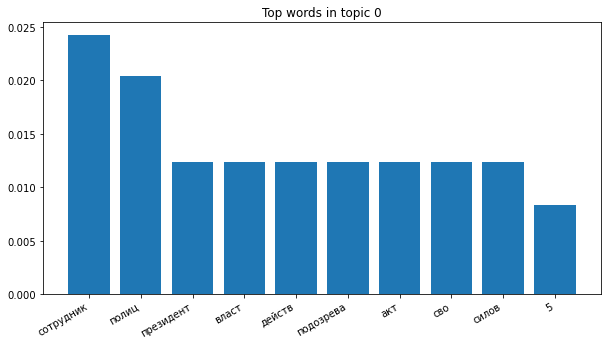

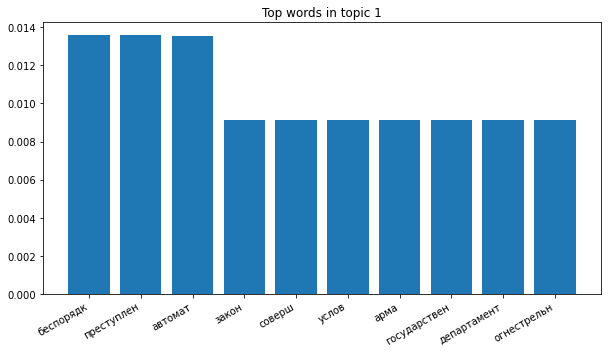

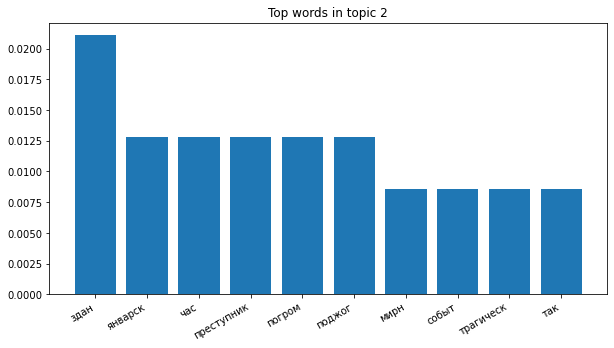

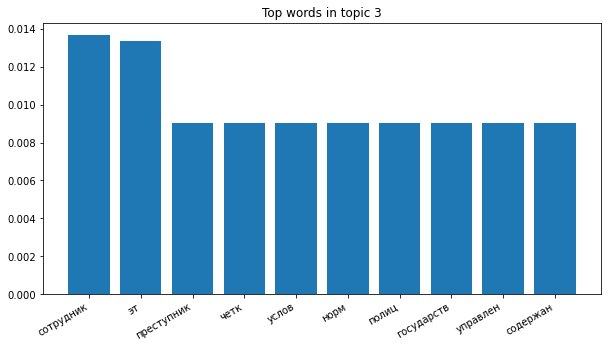

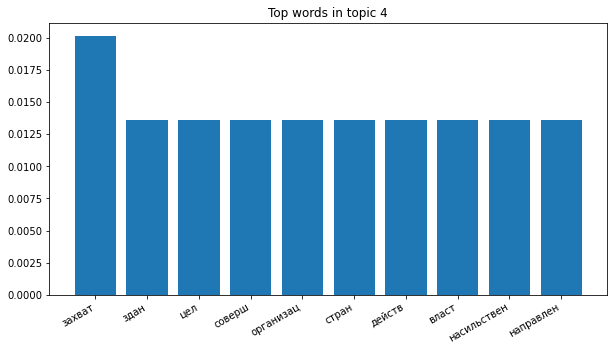

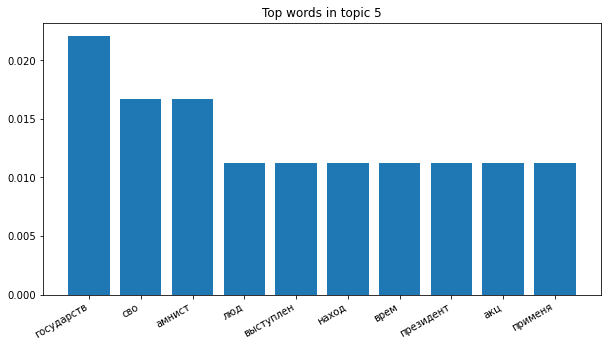

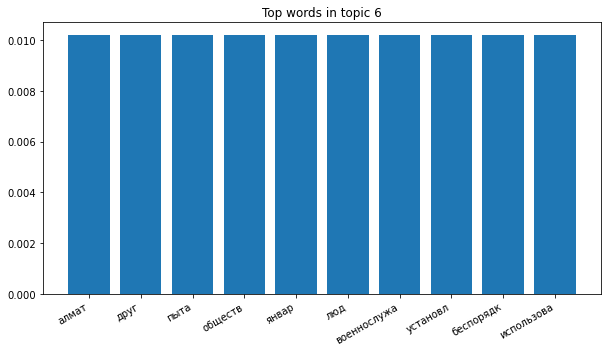

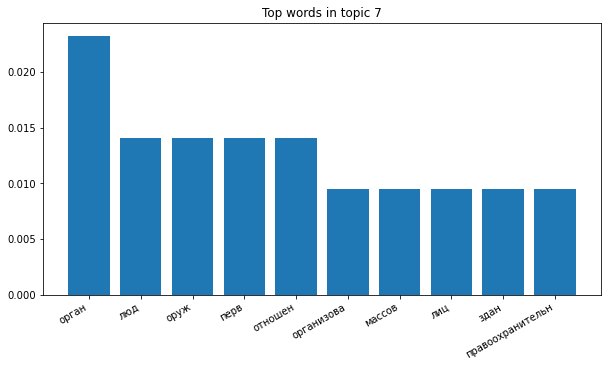

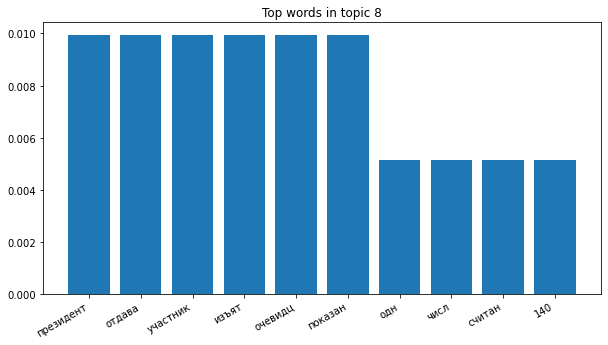

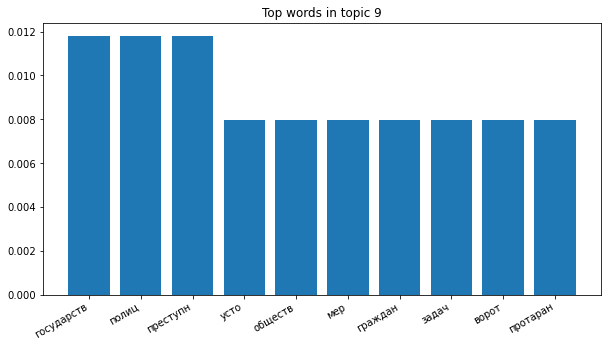

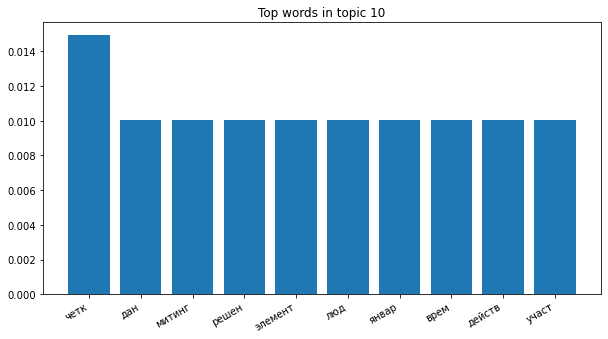

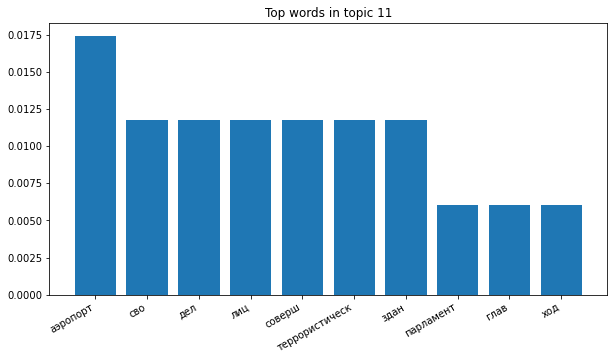

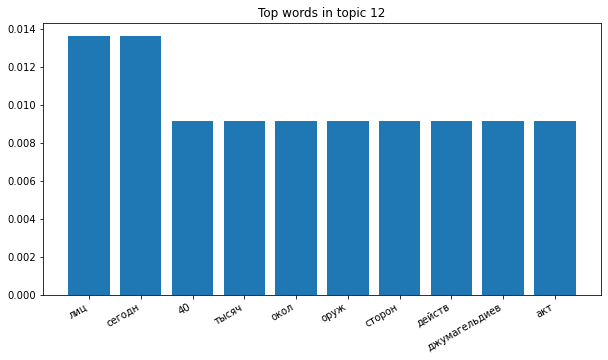

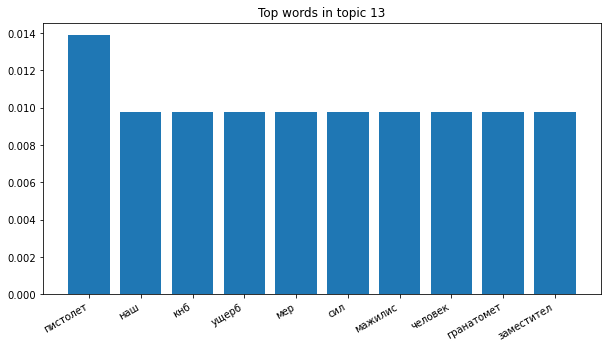

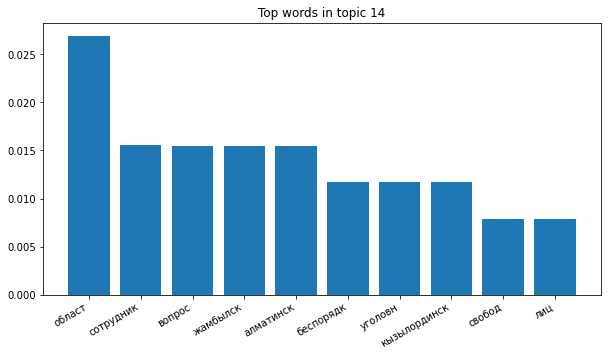

In [221]:
import matplotlib.pyplot as plt

def plot_top_words(lda_model, nb_topics):
    for i, topic in enumerate(lda_model.show_topics(num_topics=nb_topics, formatted=False)):
        top_words = [word for word, _ in topic[1]]
        weights = [weight for _, weight in topic[1]]
        
        plt.figure(figsize=(10, 5))
        plt.title(f"Top words in topic {i}")
        plt.bar(top_words, weights)
        plt.xticks(rotation=30, ha="right")
        plt.show()

# Visualize the top words of each topic
plot_top_words(lda_model, 15)

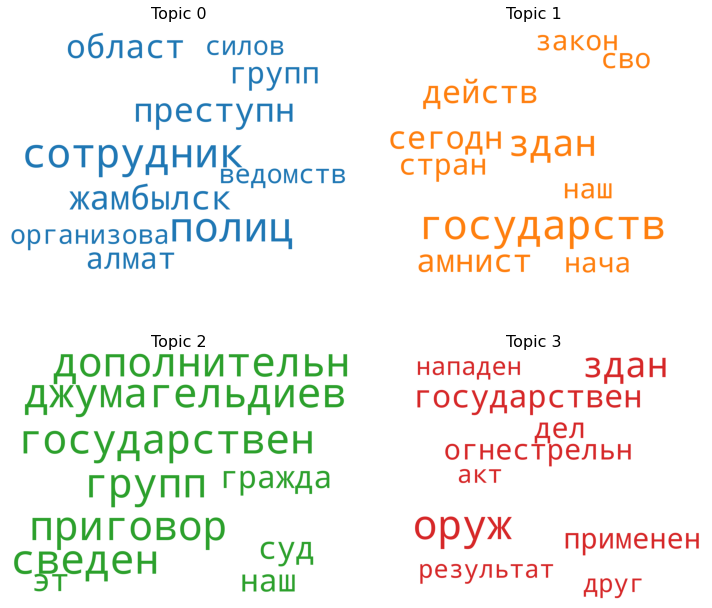

In [138]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [142]:
topic_table = pd.DataFrame(columns=['Topic ID', 'Top Words'])


In [143]:
topic_data = []



In [144]:
for topic_id, topic_words in topics:
    topic_data.append({'Topic ID': topic_id, 'Top Words': topic_words})

In [187]:

topic_table = pd.DataFrame(topic_data)
print(topic_table)



   Topic ID                                          Top Words
0         0  0.016*"област" + 0.013*"алматинск" + 0.010*"ян...
1         1  0.029*"массов" + 0.022*"беспорядк" + 0.019*"зд...
2         2  0.008*"причастн" + 0.008*"лиц" + 0.008*"ущерб"...
3         3  0.016*"действ" + 0.013*"террорист" + 0.013*"ст...
4         4  0.012*"лиц" + 0.012*"оруж" + 0.009*"государств...
5         5  0.015*"сотрудник" + 0.011*"ведомств" + 0.011*"...
6         6  0.018*"джумагельдиев" + 0.015*"арма" + 0.011*"...
7         7  0.014*"действ" + 0.014*"лиц" + 0.014*"государс...
8         8  0.012*"оруж" + 0.012*"наход" + 0.010*"участ" +...
9         9  0.027*"полиц" + 0.018*"сво" + 0.012*"президент...


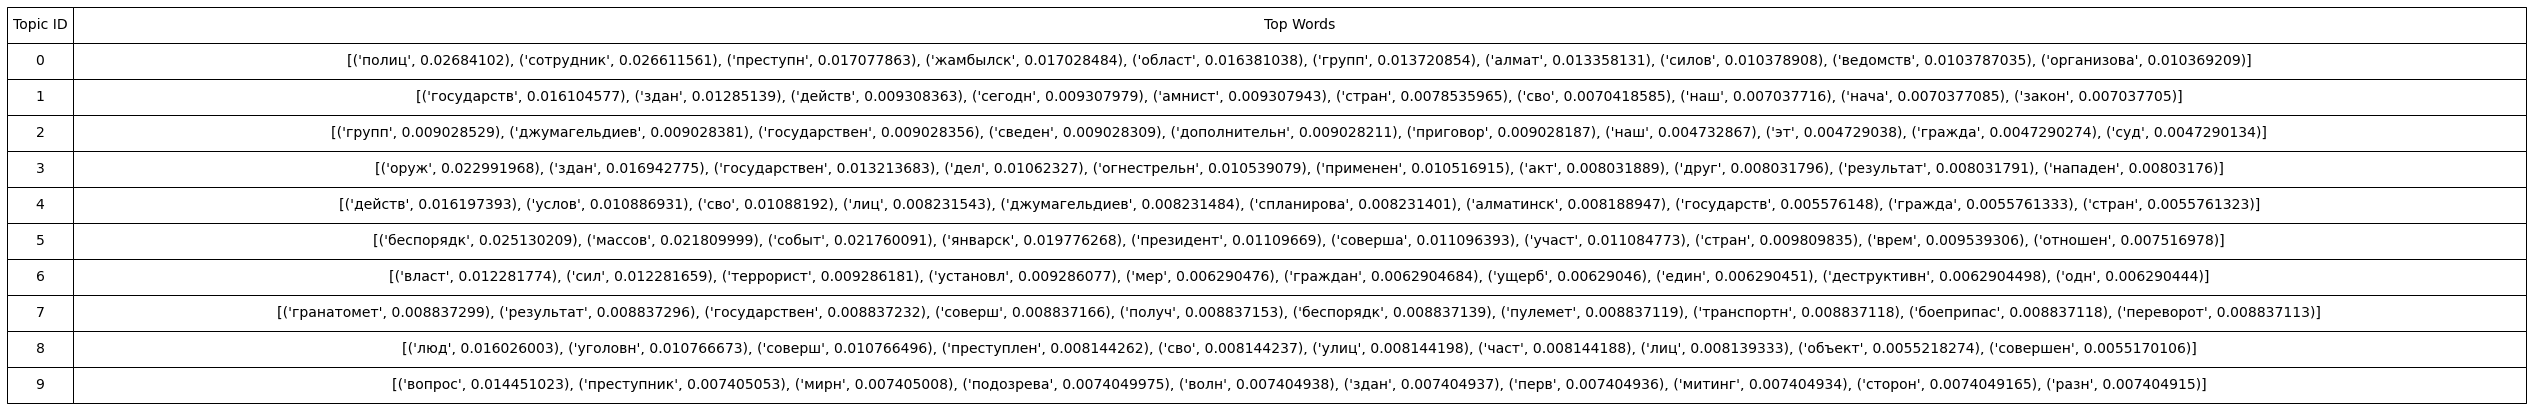

In [147]:
plt.figure(figsize=(12, 6))
table = plt.table(cellText=topic_table.values,
                  colLabels=topic_table.columns,
                  loc='center',
                  cellLoc='center',
                  fontsize=14)  # Increase font size

table.auto_set_font_size(False)
table.set_fontsize(14)  # Set font size explicitly
table.scale(1,3)  # Scale the table size

# Specify the widths of the columns
table.auto_set_column_width(0)  # Set the width of the first column automatically
table.auto_set_column_width([1])  # Set the width of the second column automatically

plt.axis('off')
plt.savefig('public_officials123.png', bbox_inches='tight')
plt.show()

In [209]:
import networkx as nx

def build_occurrence_network(lda_model, nb_topics):
    # Create an empty graph
    G = nx.Graph()
    
    # Extract top words for each topic
    for i, topic in enumerate(lda_model.show_topics(num_topics=nb_topics, formatted=False)):
        top_words = [word for word, _ in topic[1]]
        
        # Add edges between words within the same topic
        for word1 in top_words:
            for word2 in top_words:
                if word1 != word2:
                    if G.has_edge(word1, word2):
                        # Increment edge weight if edge already exists
                        G[word1][word2]['weight'] += 1
                    else:
                        # Add a new edge with weight 1
                        G.add_edge(word1, word2, weight=1)
    
    return G


In [210]:
occurrence_network = build_occurrence_network(lda_model, 10)

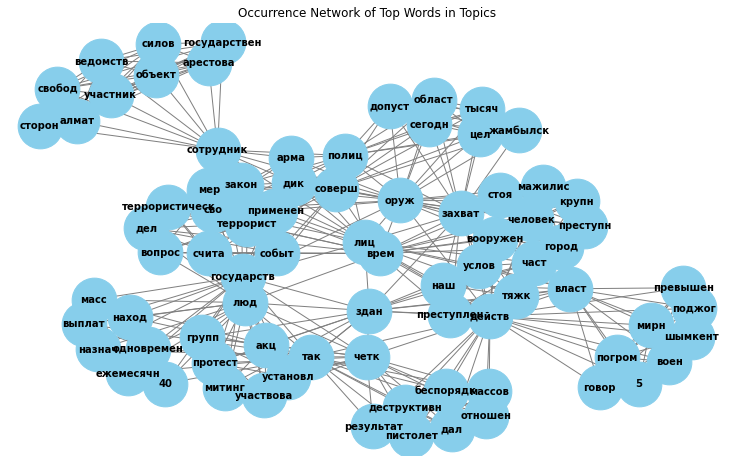

In [213]:
plt.figure(figsize=(10, 6))
pos = nx.kamada_kawai_layout(occurrence_network)  # Position nodes using Kamada-Kawai layout algorithm
nx.draw(occurrence_network, pos, with_labels=True, font_size=10, node_color='skyblue', node_size=2000, edge_color='gray', linewidths=1, font_weight='bold')
plt.title("Occurrence Network of Top Words in Topics")
plt.show()
